In [10]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key='ab2882f6485e2828c46882b863cc7c8cdaaef007')
df.head()

C:\Users\sinch\AppData\Local\Temp\ipykernel_13280\918027198.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='ab2882f6485e2828c46882b863cc7c8cdaaef007')


close    high      low    open    volume  \
symbol date                                                                   
AAPL   2017-12-07 00:00:00+00:00  169.32  170.44  168.910  169.03  24469613   
       2017-12-08 00:00:00+00:00  169.37  171.00  168.820  170.49  23096872   
       2017-12-11 00:00:00+00:00  172.67  172.89  168.790  169.20  33092051   
       2017-12-12 00:00:00+00:00  171.70  172.39  171.461  172.15  18945457   
       2017-12-13 00:00:00+00:00  172.27  173.54  172.000  172.50  23142242   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-07 00:00:00+00:00  40.249729  40.515968  40.152266  40.180792   
       2017-12-08 00:00:00+00:00  40.261615  40.649088  40.130872  40.527854   
       2017-12-11 00:00:00+00:00  41.046071  41.098368  40.123740  40.221203   
       2017-12-12 00:00:00+00:00  40.815488  40.979511  40.758674  40.922459   
       2017-12-13 00:00:00+00:00  40.950985  41.252882  40.886802  41.005659   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-07 00:00:00+00:00   97878452      0.0          1.0  
       2017-12-08 00:00:00+00:00   92387488      0.0          1.0  
       2017-12-11 00:00:00+00:00  132368204      0.0          1.0  
       2017-12-12 00:00:00+00:00   75781828      0.0          1.0  
       2017-12-13 00:00:00+00:00   92568968      0.0          1.0

In [5]:
df.tail()

close      high      low     open  \
symbol date                                                            
AAPL   2022-11-29 00:00:00+00:00  141.17  144.8100  140.355  144.290   
       2022-11-30 00:00:00+00:00  148.03  148.7200  140.550  141.395   
       2022-12-01 00:00:00+00:00  148.31  149.1300  146.610  148.210   
       2022-12-02 00:00:00+00:00  147.81  148.0000  145.650  145.960   
       2022-12-05 00:00:00+00:00  146.63  150.9199  145.770  147.770   

                                     volume  adjClose   adjHigh   adjLow  \
symbol date                                                                
AAPL   2022-11-29 00:00:00+00:00   83763803    141.17  144.8100  140.355   
       2022-11-30 00:00:00+00:00  111380880    148.03  148.7200  140.550   
       2022-12-01 00:00:00+00:00   71250416    148.31  149.1300  146.610   
       2022-12-02 00:00:00+00:00   65447446    147.81  148.0000  145.650   
       2022-12-05 00:00:00+00:00   68826442    146.63  150.9199  145.770   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
AAPL   2022-11-29 00:00:00+00:00  144.290   83763803      0.0          1.0  
       2022-11-30 00:00:00+00:00  141.395  111380880      0.0          1.0  
       2022-12-01 00:00:00+00:00  148.210   71250416      0.0          1.0  
       2022-12-02 00:00:00+00:00  145.960   65447446      0.0          1.0  
       2022-12-05 00:00:00+00:00  147.770   68826442      0.0          1.0

In [7]:
df1 = df.reset_index()['close']
df1.head()

0    169.32
1    169.37
2    172.67
3    171.70
4    172.27
Name: close, dtype: float64

In [12]:
df1.shape

(1257,)

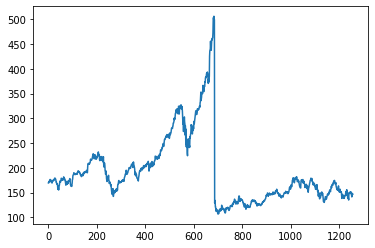

In [11]:
plt.plot(df1)

In [13]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1257, 1)

In [15]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [16]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train

array([[0.15649343, 0.15661866, 0.16488416, ..., 0.14632436, 0.15594239,
        0.17465247],
       [0.15661866, 0.16488416, 0.1624546 , ..., 0.15594239, 0.17465247,
        0.17545398],
       [0.16488416, 0.1624546 , 0.16388228, ..., 0.17465247, 0.17545398,
        0.19283657],
       ...,
       [0.02036318, 0.02537257, 0.04398247, ..., 0.05247339, 0.04578585,
        0.03812148],
       [0.02537257, 0.04398247, 0.03571697, ..., 0.04578585, 0.03812148,
        0.03328741],
       [0.04398247, 0.03571697, 0.03594239, ..., 0.03812148, 0.03328741,
        0.03651847]])

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)